In [308]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

In [309]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

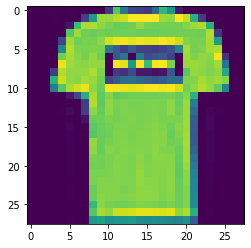

In [310]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1].reshape([28,28]))

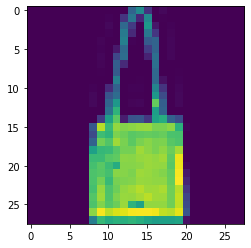

In [311]:
plt.imshow(x_train[200])

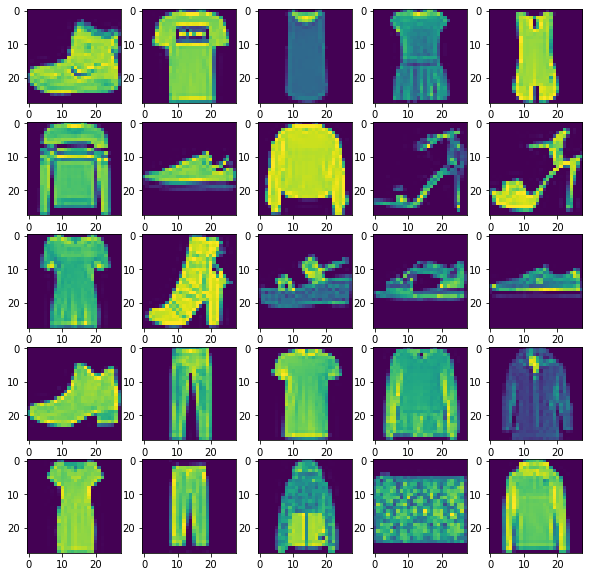

In [312]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
plt.show()


In [313]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [314]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [315]:
from tensorflow.keras.utils import to_categorical

In [316]:
# one hot encoding of target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [317]:
def create_model():
    m = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64,kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(10,activation='softmax')
    ])
    return m

In [318]:
model = create_model()
model.compile(optimizer='Adam',loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [319]:
model.fit(x_train,y_train,batch_size = 50, epochs=5)

Epoch 1/5
1200/1200 [==============================] - 44s 37ms/step - loss: 0.3873 - accuracy: 0.8632
Epoch 2/5
1200/1200 [==============================] - 46s 38ms/step - loss: 0.2604 - accuracy: 0.9053
Epoch 3/5
1200/1200 [==============================] - 46s 38ms/step - loss: 0.2156 - accuracy: 0.9202
Epoch 4/5
1200/1200 [==============================] - 47s 39ms/step - loss: 0.1832 - accuracy: 0.9325
Epoch 5/5
1200/1200 [==============================] - 49s 41ms/step - loss: 0.1567 - accuracy: 0.9425


In [320]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.2608 - accuracy: 0.9074


[0.26078155636787415, 0.9074000120162964]